In [1]:
import mooring
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [2]:
file_basename = "http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/"
file_list = ['buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-06.nc',
             'buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-07.nc',
             'buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-08.nc',
             'buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-06.nc',
             'buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-07.nc',
             'buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-08.nc',
             'buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2016-06.nc',
             'buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2016-07.nc',
             'buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2016-08.nc',
             'buoy_bahiadepalma-scb_sbe37007/L1/2017/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2017-06.nc',
             'buoy_bahiadepalma-scb_sbe37007/L1/2017/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2017-07.nc',
             'buoy_bahiadepalma-scb_sbe37007/L1/2017/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2017-08.nc',
             'buoy_bahiadepalma-scb_sbe37006/L1/2018/dep0004_buoy-bahiadepalma_scb-sbe37006_L1_2018-06.nc',
             'buoy_bahiadepalma-scb_sbe37006/L1/2018/dep0004_buoy-bahiadepalma_scb-sbe37006_L1_2018-07.nc',
             'buoy_bahiadepalma-scb_sbe37006/L1/2018/dep0004_buoy-bahiadepalma_scb-sbe37006_L1_2018-08.nc']
file_list = [file_basename + s for s in file_list]

In [3]:
colordict = {2014: "#FDB117", 2015: "#20BD00", 2016: "#6C5FBA", 
             2017: "#0FB5C4", 2018: "k"}
prop = fm.FontProperties(fname="/home/ctroupin/.fonts/Aileron-Regular.otf")
mooringName = "Bahia de Palma"
figtitleT = 'Sea water temperature ($^{\circ}$C)\n at %s buoy' %(mooringName)
figname = "tes_max"
yearmin, yearmax = 2014, 2018
monthmin, monthmax = 6, 8

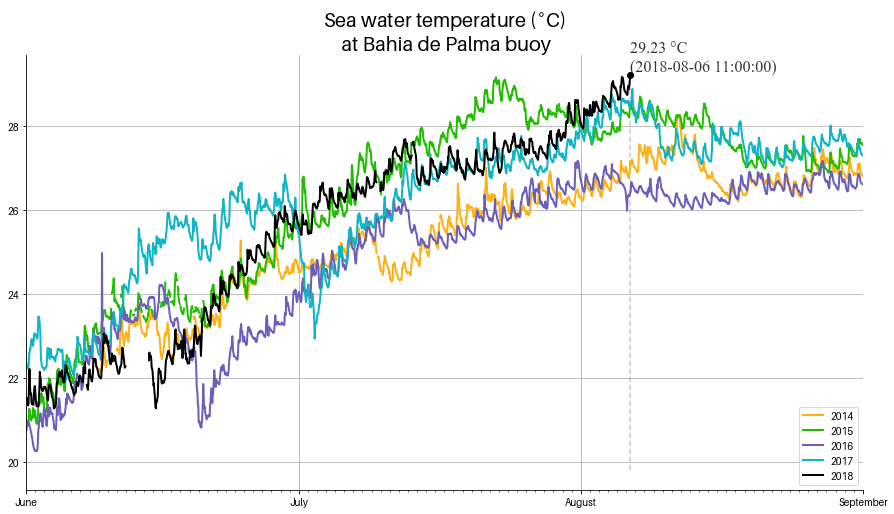

In [14]:
yearlist = []
maxT = 0
fig, ax = plt.subplots(num=None, figsize=(15, 8))
for datafile in file_list:
    m = mooring.Mooring().get_from_nc(datafile)
    m.apply_qc()
    year = m.dates[0].year
    month = m.dates[0].month
    
    m.special_qc()
    
    if year in yearlist:
        m.addT_to_plot(2014, color=colordict[year])
    else:
        yearlist.append(year)
        m.addT_to_plot(2014, label=year, color=colordict[year])
    
    Tmax, datemax = m.get_max_value(maxT)
    

plt.plot(datemax.replace(year=int(yearmin)), Tmax, "ko")
textmax = "{0} °C\n({1})".format(str(np.round(Tmax, 2)), datemax)
plt.text(datemax.replace(year=int(yearmin)), Tmax, textmax,
ha="left", va="bottom", fontsize=16,
alpha=0.8)
           
m.format_plot(ax, 2014, 6, 8, title=figtitleT, prop=prop)

ymin, ymax = ax.get_ylim()
plt.vlines(datemax.replace(year=int(yearmin)), 
           ymin, Tmax, colors='k', linestyles='--', linewidth=.3)
# plt.savefig("okokokokok", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()